# Пример вычисления разложения многочлена в окрестности нуля из статьи в Программировании №5, 2021

In [21]:
# Подключаем пакеты
import numpy as np
from scipy.spatial import ConvexHull,convex_hull_plot_2d
import matplotlib.pyplot as plt
import sympy as sym
from sympy import symbols, Function, Eq, solve, I, collect, expand, simplify,\
                  Derivative, init_printing, evaluate, Poly, plot, plot_implicit
from copy import copy
from spb import *
import spb as spb
# Это настройки, позволяющие выводить 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
init_printing() # Для красивой печати

In [2]:
# Загрузка алгоритмов степенной геометрии
from PG.pglib import *

In [3]:
x,y,z = symbols("x y z",real=True)

In [4]:
f_orig = 4 * x ** 5 * y - 4 * x ** 5 * z + 48 * x ** 4 * y ** 2 - 92 * x ** 4 * y * z + 40 * x ** 4 * z ** 2 + 344 * x ** 3 * y ** 3 - 904 * x ** 3 * y ** 2 * z + 736 * x ** 3 * y * z ** 2 - 192 * x ** 3 * z ** 3 + 1200 * x ** 2 * y ** 4 - 4376 * x ** 2 * y ** 3 * z + 5360 * x ** 2 * y ** 2 * z ** 2 - 2752 * x ** 2 * y * z ** 3 + 512 * x ** 2 * z ** 4 + 2500 * x * y ** 5 - 11700 * x * y ** 4 * z + 19168 * x * y ** 3 * z ** 2 - 14656 * x * y ** 2 * z ** 3 + 5376 * x * y * z ** 4 - 768 * x * z ** 5 - 7500 * y ** 5 * z + 21800 * y ** 4 * z ** 2 - 25408 * y ** 3 * z ** 3 + 14848 * y ** 2 * z ** 4 - 4352 * y * z ** 5 + 512 * z ** 6 + 2 * x ** 5 + 82 * x ** 4 * y - 64 * x ** 4 * z + 740 * x ** 3 * y ** 2 - 1152 * x ** 3 * y * z + 456 * x ** 3 * z ** 2 + 3156 * x ** 2 * y ** 3 - 6784 * x ** 2 * y ** 2 * z + 5144 * x ** 2 * y * z ** 2 - 1344 * x ** 2 * z ** 3 + 6490 * x * y ** 4 - 14464 * x * y ** 3 * z + 13816 * x * y ** 2 * z ** 2 - 6720 * x * y * z ** 3 + 1344 * x * z ** 4 + 20250 * y ** 5 - 45120 * y ** 4 * z + 37928 * y ** 3 * z ** 2 - 14976 * y ** 2 * z ** 3 + 2880 * y * z ** 4 - 256 * z ** 5 + 13 * x ** 4 + 412 * x ** 3 * y - 344 * x ** 3 * z + 2782 * x ** 2 * y ** 2 - 5176 * x ** 2 * y * z + 2200 * x ** 2 * z ** 2 + 828 * x * y ** 3 - 12936 * x * y ** 2 * z + 15888 * x * y * z ** 2 - 5088 * x * z ** 3 - 37827 * y ** 4 + 67608 * y ** 3 * z - 35496 * y ** 2 * z ** 2 + 2016 * y * z ** 3 + 1872 * z ** 4 + 64 * x ** 3 + 1728 * x ** 2 * y - 1152 * x ** 2 * z + 15552 * x * y ** 2 - 20736 * x * y * z + 6912 * x * z ** 2 + 46656 * y ** 3 - 93312 * y ** 2 * z + 62208 * y * z ** 2 - 13824 * z ** 3
f_orig

In [5]:
f_x0 = f_orig.subs(x,0).factor()
f_x0

In [6]:
h = f_x0.args[2]
h

In [7]:
S,C = SCH(h,[y,z])
print(S.T)

[[0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 4 4]
 [2 3 4 5 1 2 3 4 0 1 2 3 0 1 2 0 1]]


In [8]:
# только нормали из 3-го квадранта
normlst = Normlst(C)
[(i,normal) for i,normal in enumerate(normlst) if normal[0]<0 and normal[1]<0]

[(1, array([-1, -1], dtype=int32))]

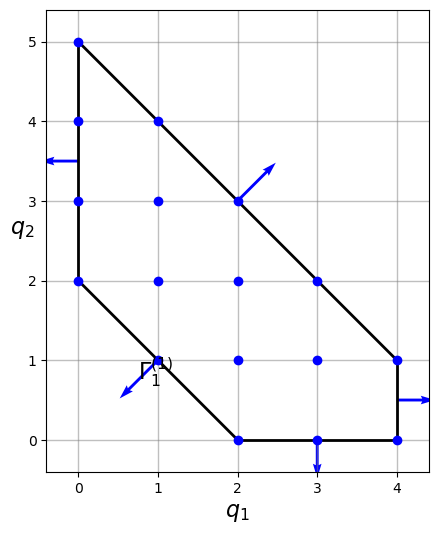

In [9]:
ax = NPimage(C,S,withNormals=True)
AddEdgeLabel(ax,S,C,normlst,1,r'$\Gamma_1^{(1)}$')
#AddEdgeLabel(ax,S,C,normlst,2,r'$\Gamma_2^{(1)}$')
#AddEdgeLabel(ax,S,C,normlst,0,r'$\Gamma_3^{(1)}$')
#plt.savefig("NPwNormals.png",dpi=300,bbox_inches='tight')
plt.show()

In [10]:
h_tr1 = GetTrunc(h,C,1,[y,z])
h_tr1

In [11]:
t = symbols("t",real = True)
Eq(h_tr1.args[1].args[0],t)

In [12]:
Subs_z = solve(Eq(h_tr1.args[1].args[0],t),z,dict=True)[0]
Subs_z

In [13]:
h_st2 = h.subs(Subs_z).expand()
h_st2

In [14]:
Sst2,Cst2 = SCH(h_st2,[y,t])
normlst_st2 = Normlst(Cst2)
[(i,normal) for i,normal in enumerate(normlst_st2) if normal[0]<0 and normal[1]<0]

[(2, array([-1, -2], dtype=int32))]

In [15]:
h_st2tr2 = GetTrunc(h_st2,Cst2,2,[y,t])
h_st2tr2

In [16]:
u = symbols("u",real = True)
Eq(h_st2tr2.args[1].args[0],12*u)

In [17]:
Subs_t = solve(Eq(h_st2tr2.args[1].args[0],12*u),t,dict=True)[0]
Subs_t

In [18]:
h_st3 = h_st2.subs(Subs_t).expand()
h_st3

In [19]:
Sst3,Cst3 = SCH(h_st3,[y,u])
normlst_st3 = Normlst(Cst3)
[(i,normal) for i,normal in enumerate(normlst_st3) if normal[0]<0 and normal[1]<0]

[(2, array([-2, -5], dtype=int32))]

In [20]:
h_st3tr2 = GetTrunc(h_st3,Cst3,2,[y,u])
h_st3tr2

In [22]:
Sol_u = solve(h_st3tr2,u,dict=True)
Sol_u

In [23]:
branch0 = Subs_z[z].subs(Subs_t).subs(Sol_u[0])
branch0
branch1 = Subs_z[z].subs(Subs_t).subs(Sol_u[1])
branch1

Выполним степенное преобразование, которое переведет вектор нормали $[-2,-5]$ в вектор $[0,k]$

In [30]:
alpha1 = UniMod1(*(-normlst_st3[2]))
alpha1,alpha1.inv(),np.matmul(normlst_st3[2],alpha1)
alpha2 = UniMod2(*(-normlst_st3[2]))
alpha2,alpha2.inv(),np.matmul(alpha2,normlst_st3[2].T)

(Matrix([
 [ 5, -2],
 [-2,  1]]),
 Matrix([
 [1, 2],
 [2, 5]]),
 array([0, -1], dtype=object))

(Matrix([
 [-2, 1],
 [-5, 2]]),
 Matrix([
 [2, -1],
 [5, -2]]),
 array([-1, 0], dtype=object))

In [25]:
newvars = symbols(r"\xi_1:3",real=True)
newvars

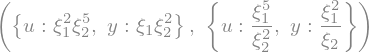

In [30]:
Subs_yu1=PowTrans(alpha1.inv(),[y,u],newvars)
Subs_yu2=PowTrans(alpha2.inv(),[y,u],newvars)
Subs_yu1,Subs_yu2

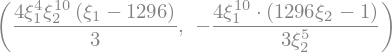

In [32]:
h_st3tr2.subs(Subs_yu1).factor(),h_st3tr2.subs(Subs_yu2).factor()

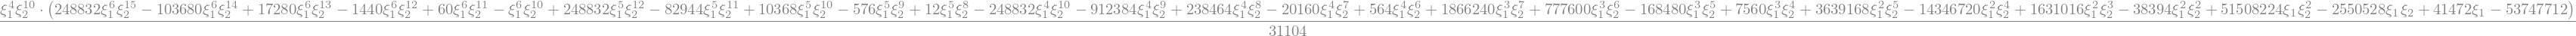

In [35]:
h_st3.subs(Subs_yu1).factor()#.args[3]

Expansion at the infinity

In [12]:
[(i,normal) for i,normal in enumerate(normlst) if normal[0]>0 and normal[1]>0]

[(4, array([1, 1], dtype=int32))]

In [13]:
h_tr4 = GetTrunc(h,C,4,[y,z])
h_tr4

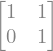

In [15]:
alpha4 = UniMod1(*(normlst[4]))
alpha4inv = alpha4.inv()
alpha4inv


In [16]:
newvars = symbols(r"\xi_1:3",real=True)
newvars

In [17]:
Subs_yz4=PowTrans(alpha4inv,[y,z],newvars)
Subs_yz4

In [21]:
h_tr4_xi = h_tr4.subs(Subs_yz4).factor()
h_tr4_xi

In [23]:
sym.solve(h_tr4_xi.args[2],newvars[0])